## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
from keras.datasets import fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [22]:
type(x_train[0])

numpy.ndarray

In [23]:
x_train[0].shape

(28, 28)

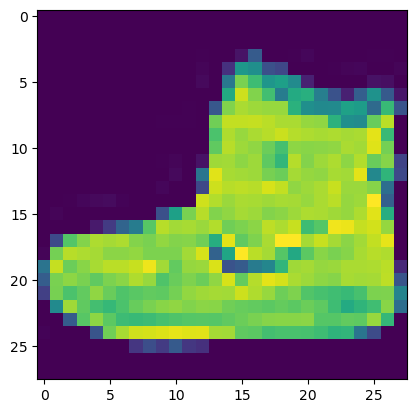

In [24]:
plt.imshow(x_train[0])

In [44]:
y_train[0]

9

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [28]:
x_train=x_train/255
x_test=x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [32]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
x_test.shape

(10000, 28, 28)

In [34]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


In [35]:
x_train.shape

(60000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [39]:
from keras.utils import to_categorical

In [49]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [47]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [50]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

In [51]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [52]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [54]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4097 - accuracy: 0.8535
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2792 - accuracy: 0.8992
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2385 - accuracy: 0.9122
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2116 - accuracy: 0.9228
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1904 - accuracy: 0.9310
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1730 - accuracy: 0.9367
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1583 - accuracy: 0.9426
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1451 - accuracy: 0.9482
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1338 - accuracy: 0.9520
Epoch 10/10
1875/1875 [==============================] - 26s 14ms/s

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [55]:
model.metrics_names

['loss', 'accuracy']

In [58]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3640 - accuracy: 0.9038


[0.36404967308044434, 0.9038000106811523]

In [60]:
from sklearn.metrics import classification_report

In [61]:
preds_prob = model.predict(x_test)
predictions = np.argmax(preds_prob,axis=1)

313/313 [==============================] - 1s 3ms/step


In [62]:
y_cat_test.shape

(10000, 10)

In [63]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [64]:
predictions[0]

9

In [65]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.86      0.85      1000
           3       0.92      0.92      0.92      1000
           4       0.77      0.91      0.83      1000
           5       0.97      0.98      0.98      1000
           6       0.82      0.61      0.70      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



## Predicting a given image

In [74]:
my_image =x_test[2]

In [75]:
my_image.shape

(28, 28, 1)

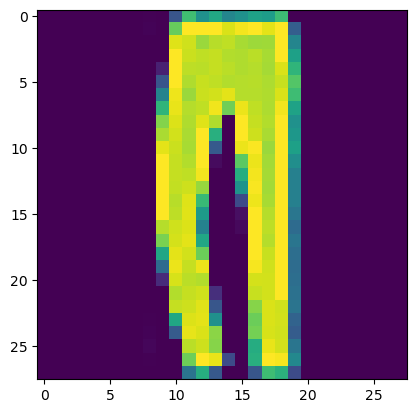

In [76]:
plt.imshow(my_image)

In [77]:
preds_prob = model.predict(my_image.reshape(1,28,28,1))
predictions = np.argmax(preds_prob,axis=1)


1/1 [==============================] - 0s 20ms/step


In [78]:
predictions

array([1], dtype=int64)